<a href="https://colab.research.google.com/github/veranery/AnalisedeDadosVacina/blob/main/AnaliseDeDadosVacinaCovid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from plotly.express import histogram


O conjunto de dados contém pontos de dados como a contagem cumulativa de pessoas que receberam pelo menos uma dose da vacina, novas doses administradas em uma data específica, contagem cumulativa de doses distribuídas no país, percentual da população que completou a série completa de vacinas , contagem cumulativa de doses das vacinas Pfizer e Moderna administradas em cada estado, médias contínuas de sete dias para novas doses administradas e distribuídas, entre outros.

In [2]:
dados = pd.read_csv('cdc_vaccines_distributed_administered_by_jurisdiction.csv')
dados_estadual = pd.read_csv('cdc_vaccines_distributed_administered_by_jurisdiction_timeseries.csv')
dados_nacionais = pd.read_csv('cdc_vaccines_distributed_administered_national_timeseries.csv')

In [3]:
df_completo_estadual = pd.concat([dados,dados_estadual], ignore_index=True)
df_completo_estadual


,index,state_abbreviation,state_name,date,doses_distributed,doses_distributed_per_100k,doses_administered,doses_administered_per_100k,people_received_at_least_one_dose,people_vaccine_series_complete,...,doses_administered_unknown_manufacturer,pct_population_received_at_least_one_dose,pct_population_series_complete,population,doses_distributed_cumulative,doses_administered_cumulative,new_doses_distributed,new_doses_administered,new_doses_distributed_7_day_rolling_avg,new_doses_administered_7_day_rolling_avg
0,0,AK,Alaska,2023-02-15,2116435.0,289310.0,1316657.0,179983.0,533981.0,476305.0,...,1507.0,73.0,65.1,731545.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1,AL,Alabama,2023-02-15,12126780.0,247325.0,6980749.0,142372.0,3186211.0,2606107.0,...,887.0,65.0,53.2,4903185.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2,AR,Arkansas,2023-02-15,8213520.0,272169.0,4844298.0,160524.0,2108703.0,1715689.0,...,4678.0,69.9,56.9,3017804.0,NaN,NaN,NaN,NaN,NaN,NaN
3,3,AS,American Samoa,2023-02-15,128480.0,271101.0,115163.0,243001.0,46188.0,42465.0,...,1280.0,95.0,89.6,47392.0,NaN,NaN,NaN,NaN,NaN,NaN
4,4,AZ,Arizona,2023-02-15,19452760.0,267255.0,14465675.0,198739.0,5645008.0,4803643.0,...,53807.0,77.6,66.0,7278717.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37192,37129,WY,Wyoming,2023-01-18,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1251175.0,847354.0,4320.0,198.0,3827.14,1676.86
37193,37130,WY,Wyoming,2023-01-25,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1252935.0,847465.0,1760.0,111.0,2992.86,1634.57
37194,37131,WY,Wyoming,2023-02-01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1254395.0,847573.0,1460.0,108.0,2804.29,1613.14
37195,37132,WY,Wyoming,2023-02-08,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1257355.0,847666.0,2960.0,93.0,2470.00,562.71


In [4]:
df_completo_estadual = df_completo_estadual.drop('index', axis=1)


In [5]:
df_completo_estadual = df_completo_estadual.fillna(0)
df_completo_estadual

,state_abbreviation,state_name,date,doses_distributed,doses_distributed_per_100k,doses_administered,doses_administered_per_100k,people_received_at_least_one_dose,people_vaccine_series_complete,doses_administered_moderna,...,doses_administered_unknown_manufacturer,pct_population_received_at_least_one_dose,pct_population_series_complete,population,doses_distributed_cumulative,doses_administered_cumulative,new_doses_distributed,new_doses_administered,new_doses_distributed_7_day_rolling_avg,new_doses_administered_7_day_rolling_avg
0,AK,Alaska,2023-02-15,2116435.0,289310.0,1316657.0,179983.0,533981.0,476305.0,504245.0,...,1507.0,73.0,65.1,731545.0,0.0,0.0,0.0,0.0,0.00,0.00
1,AL,Alabama,2023-02-15,12126780.0,247325.0,6980749.0,142372.0,3186211.0,2606107.0,3021532.0,...,887.0,65.0,53.2,4903185.0,0.0,0.0,0.0,0.0,0.00,0.00
2,AR,Arkansas,2023-02-15,8213520.0,272169.0,4844298.0,160524.0,2108703.0,1715689.0,2063845.0,...,4678.0,69.9,56.9,3017804.0,0.0,0.0,0.0,0.0,0.00,0.00
3,AS,American Samoa,2023-02-15,128480.0,271101.0,115163.0,243001.0,46188.0,42465.0,25549.0,...,1280.0,95.0,89.6,47392.0,0.0,0.0,0.0,0.0,0.00,0.00
4,AZ,Arizona,2023-02-15,19452760.0,267255.0,14465675.0,198739.0,5645008.0,4803643.0,5573103.0,...,53807.0,77.6,66.0,7278717.0,0.0,0.0,0.0,0.0,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37192,WY,Wyoming,2023-01-18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1251175.0,847354.0,4320.0,198.0,3827.14,1676.86
37193,WY,Wyoming,2023-01-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1252935.0,847465.0,1760.0,111.0,2992.86,1634.57
37194,WY,Wyoming,2023-02-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1254395.0,847573.0,1460.0,108.0,2804.29,1613.14
37195,WY,Wyoming,2023-02-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1257355.0,847666.0,2960.0,93.0,2470.00,562.71


Análise de Vacinação: Este conjunto de dados pode ser usado para analisar o progresso das vacinações COVID-19 nos Estados Unidos. Ao examinar as contagens cumulativas de doses distribuídas e administradas, bem como o número de pessoas que receberam pelo menos uma dose ou completaram a série de vacinas, os investigadores e decisores políticos podem avaliar a eficácia da implementação das vacinas e monitorizar as taxas de vacinação ao longo do tempo.

Comparação Regional: Com dados disponíveis para cada estado, este conjunto de dados permite comparações dos esforços de vacinação em diferentes regiões dos Estados Unidos. Os investigadores podem analisar e comparar métricas como doses administradas por 100 mil habitantes ou percentagem da população que recebeu pelo menos uma dose para identificar variações nas estratégias de distribuição de vacinas, acesso às vacinas ou níveis de hesitação entre diferentes estados.

Análise do fabricante: O conjunto de dados inclui informações sobre doses de vacinas administradas pelo fabricante (Pfizer, Moderna), bem como uma categoria de fabricante desconhecida. Esses dados podem ser usados ​​para estudar padrões de administração de vacinas com base nos fabricantes e avaliar quaisquer discrepâncias ou tendências relacionadas à disponibilidade, preferência ou eficácia de vacinas específicas em diferentes estados.

In [6]:
df_completo_estadual = df_completo_estadual.drop_duplicates()

In [7]:
dados_distribuicao_estado = df_completo_estadual[['date','state_abbreviation', 'doses_distributed']]

**O SOMATÓRIO DAS DOSES DISTRIBUIDAS ESTAO EM 'doses_distributed' E O DECORRER DOS MESES ESTÃO NA VARIAVEL "doses_distributed_cumulative". ENTAO É PARA FILTRAR OS DADOS SO ATE A DATA 15/02/2023. POIS ESSA FOI A ULTIMA ATUALIZACAO**


<ipython-input-8-c04cd07cf044>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x = 'state_abbreviation', y = "doses_distributed", kind= "bar", data = dados_distribuicao_estado, aspect = 3,


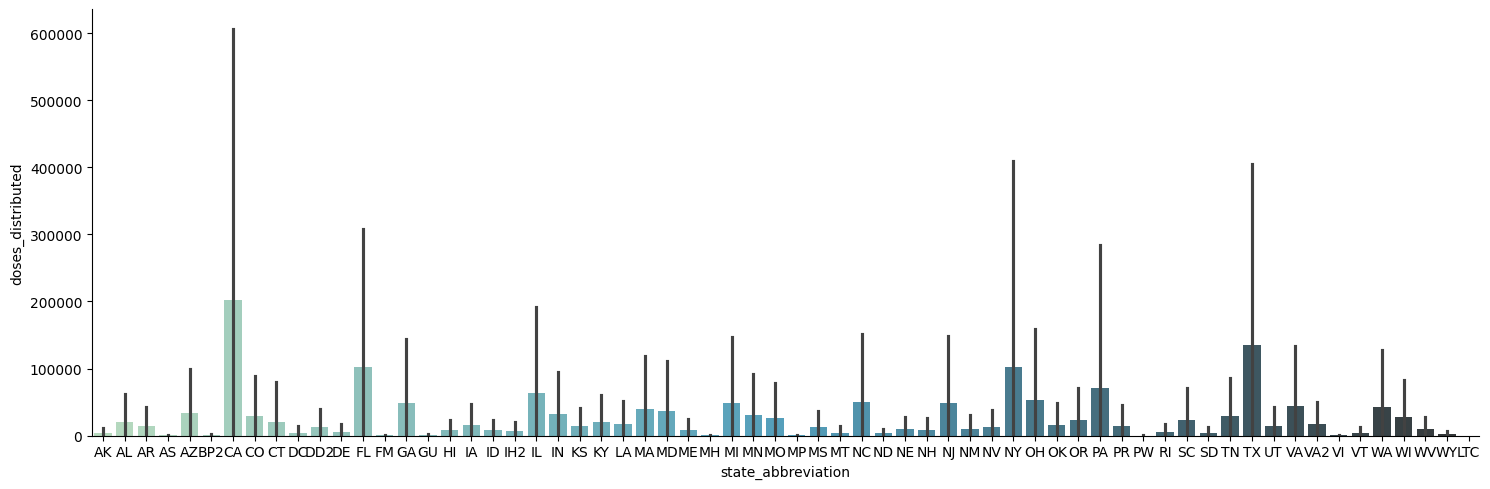

In [8]:
sns.catplot(x = 'state_abbreviation', y = "doses_distributed", kind= "bar", data = dados_distribuicao_estado, aspect = 3,
    palette = "GnBu_d")

In [28]:
dados_distribuicao = df_completo_estadual[['date', 'state_abbreviation', 'doses_distributed_cumulative','doses_administered_cumulative']]
dados_distribuicao

,date,state_abbreviation,doses_distributed_cumulative,doses_administered_cumulative
0,2023-02-15,AK,0.0,0.0
1,2023-02-15,AL,0.0,0.0
2,2023-02-15,AR,0.0,0.0
3,2023-02-15,AS,0.0,0.0
4,2023-02-15,AZ,0.0,0.0
...,...,...,...,...
37192,2023-01-18,WY,1251175.0,847354.0
37193,2023-01-25,WY,1252935.0,847465.0
37194,2023-02-01,WY,1254395.0,847573.0
37195,2023-02-08,WY,1257355.0,847666.0


In [29]:
dados_ca = df_completo_estadual.loc[df_completo_estadual['state_abbreviation'] == 'CA']
dados_ca


,state_abbreviation,state_name,date,doses_distributed,doses_distributed_per_100k,doses_administered,doses_administered_per_100k,people_received_at_least_one_dose,people_vaccine_series_complete,doses_administered_moderna,...,pct_population_received_at_least_one_dose,pct_population_series_complete,population,doses_distributed_cumulative,doses_administered_cumulative,new_doses_distributed,new_doses_administered,new_doses_distributed_7_day_rolling_avg,new_doses_administered_7_day_rolling_avg,pct_administered
6,CA,California,2023-02-15,118342075.0,299508.0,87671514.0,221885.0,33479486.0,29497857.0,32804964.0,...,84.7,74.7,39512223.0,0.0,0.0,0.0,0.0,0.00,0.00,74.08
3572,CA,California,2020-12-14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,33150.0,0.0,0.0,0.0,0.00,0.00,NaN
3573,CA,California,2020-12-15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,148200.0,0.0,115050.0,0.0,0.00,0.00,NaN
3574,CA,California,2020-12-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,195000.0,4.0,46800.0,4.0,0.00,0.00,NaN
3575,CA,California,2020-12-17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,326625.0,273.0,131625.0,269.0,0.00,0.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4152,CA,California,2023-01-18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,117266495.0,87258291.0,427050.0,235812.0,550144.29,281974.29,NaN
4153,CA,California,2023-01-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,117571755.0,87395283.0,305260.0,136992.0,510831.43,247547.71,NaN
4154,CA,California,2023-02-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,117816105.0,87507137.0,244350.0,111854.0,453180.00,210690.57,NaN
4155,CA,California,2023-02-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,118110955.0,87584300.0,294850.0,77163.0,363165.71,219701.71,NaN


<ipython-input-30-b38b2b237672>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x = 'state_abbreviation', y = "doses_distributed_cumulative", kind= "bar", data = dados_distribuicao, aspect = 3,


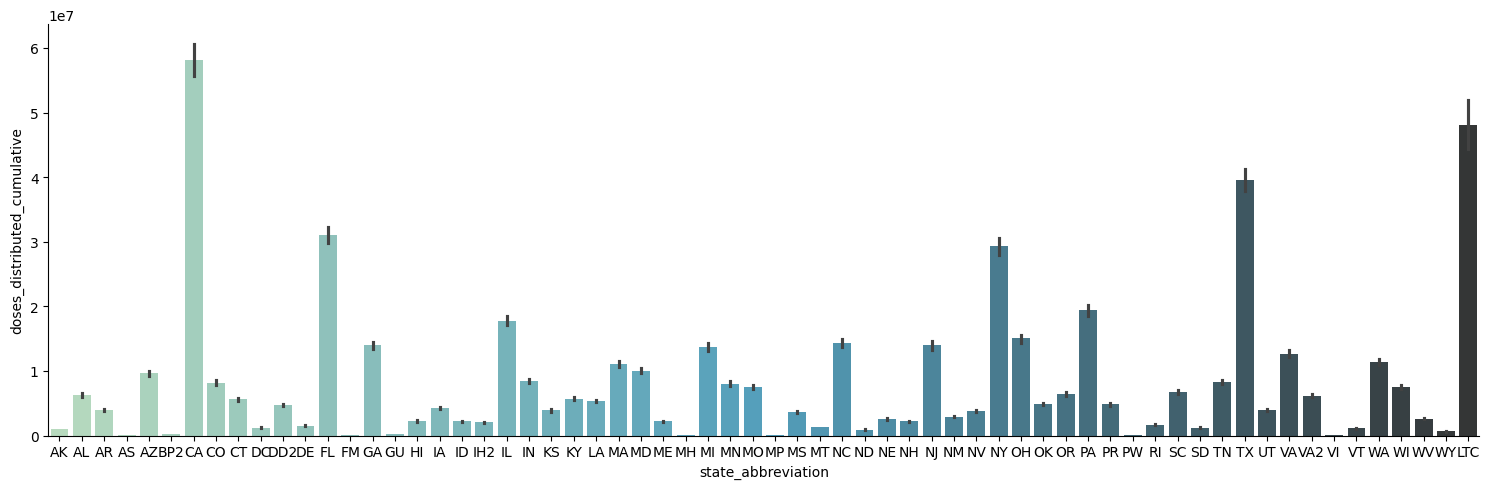

In [30]:
sns.catplot(x = 'state_abbreviation', y = "doses_distributed_cumulative", kind= "bar", data = dados_distribuicao, aspect = 3,
    palette = "GnBu_d")

Realizando a soma da doses distribuídas ao longo de cada mês

In [31]:
import datetime as dt

dados_distribuicao['date'] = pd.to_datetime(dados_distribuicao['date'])
doses_por_mes = dados_distribuicao.groupby(pd.Grouper(key='date', freq='M'))['doses_distributed_cumulative'].sum()
doses_por_mes = doses_por_mes.reset_index()
doses_por_mes

<ipython-input-31-acb1ae1ede33>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_distribuicao['date'] = pd.to_datetime(dados_distribuicao['date'])


,date,doses_distributed_cumulative
0,2020-12-31,1.441152e+08
1,2021-01-31,1.150066e+09
2,2021-02-28,2.299481e+09
3,2021-03-31,5.218417e+09
4,2021-04-30,8.971096e+09
5,2021-05-31,1.257585e+10
6,2021-06-30,1.350644e+10
7,2021-07-31,1.455836e+10
8,2021-08-31,1.591479e+10
9,2021-09-30,1.706937e+10


<ipython-input-13-09d1bf0656d2>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x = 'date', y = "doses_distributed_cumulative", kind= "bar", data = doses_por_mes, aspect = 5,


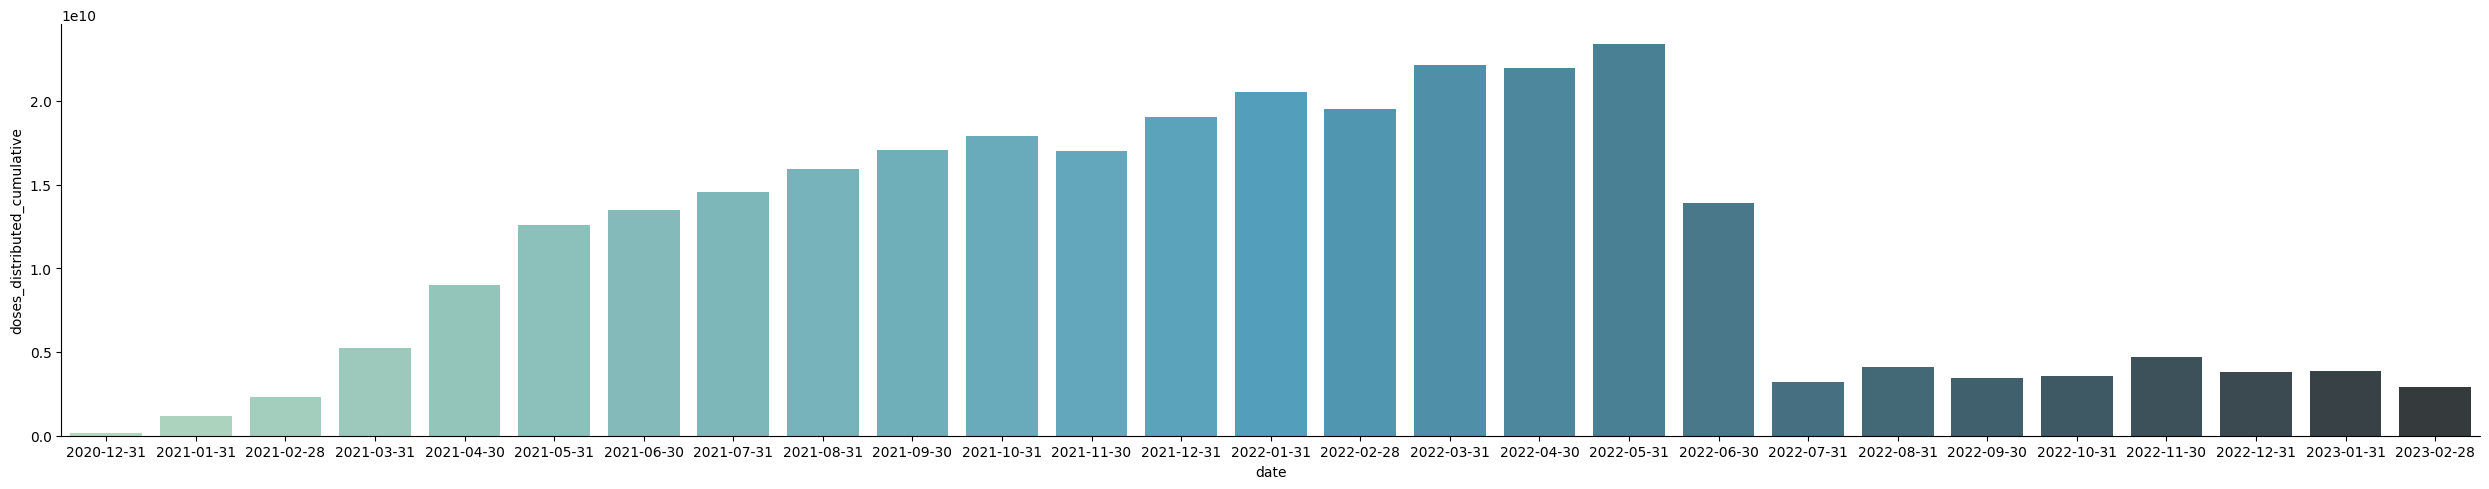

In [13]:
sns.catplot(x = 'date', y = "doses_distributed_cumulative", kind= "bar", data = doses_por_mes, aspect = 5,
    palette = "GnBu_d")

Aqui é possível notar que as vacinas começaram a ser distribuídas em 30/04/2021 e teve uma diminuição brusca no mês julho.





In [32]:
dados_distribuicao['date'] = pd.to_datetime(dados_distribuicao['date'])
doses_por_mes_admnistradas = dados_distribuicao.groupby(pd.Grouper(key='date', freq='M'))['doses_administered_cumulative'].sum()
doses_por_mes_admnistradas= doses_por_mes_admnistradas.reset_index()
doses_por_mes_admnistradas

<ipython-input-32-2299a73f7597>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_distribuicao['date'] = pd.to_datetime(dados_distribuicao['date'])


,date,doses_administered_cumulative
0,2020-12-31,2.570369e+07
1,2021-01-31,5.083473e+08
2,2021-02-28,1.660005e+09
3,2021-03-31,3.859719e+09
4,2021-04-30,6.428898e+09
5,2021-05-31,8.927397e+09
6,2021-06-30,9.872146e+09
7,2021-07-31,1.098799e+10
8,2021-08-31,1.164672e+10
9,2021-09-30,1.203721e+10


<ipython-input-33-09d1bf0656d2>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x = 'date', y = "doses_distributed_cumulative", kind= "bar", data = doses_por_mes, aspect = 5,


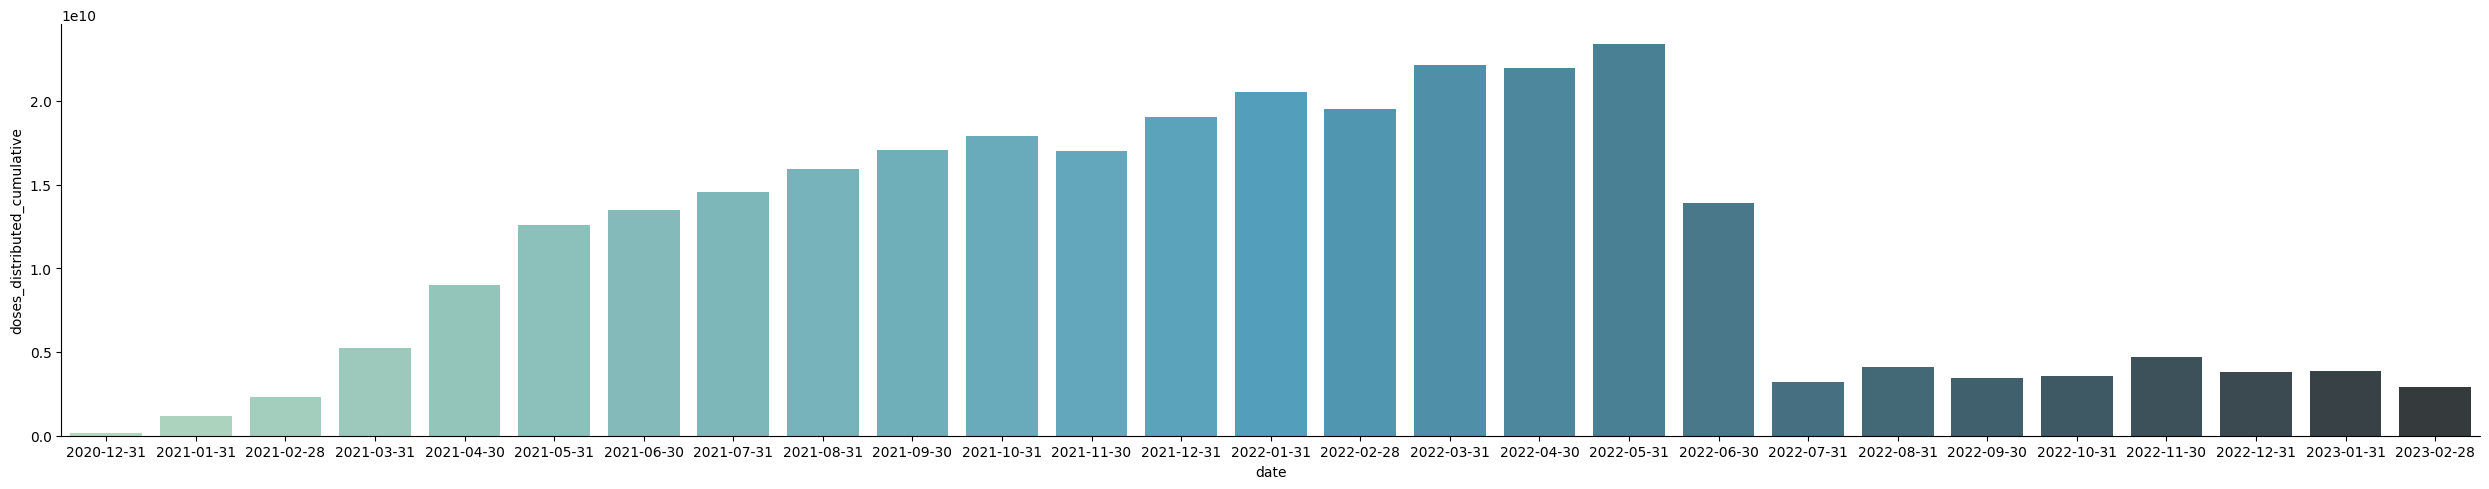

In [33]:
sns.catplot(x = 'date', y = "doses_distributed_cumulative", kind= "bar", data = doses_por_mes, aspect = 5,
    palette = "GnBu_d")

In [14]:
import datetime as dt

dados_distribuicao['date'] = pd.to_datetime(dados_distribuicao['date'])
doses_por_ano = dados_distribuicao.groupby(pd.Grouper(key='date', freq='Y'))['doses_distributed_cumulative'].sum()
doses_por_ano = doses_por_ano.reset_index()
doses_por_ano

<ipython-input-14-0132104aa1b9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_distribuicao['date'] = pd.to_datetime(dados_distribuicao['date'])


,date,doses_distributed_cumulative
0,2020-12-31,1.441152e+08
1,2021-12-31,1.452203e+11
2,2022-12-31,1.442647e+11
3,2023-12-31,6.814586e+09


<ipython-input-15-3ea24b2de634>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x = 'date', y = "doses_distributed_cumulative", kind= "bar", data = doses_por_ano, aspect = 5,


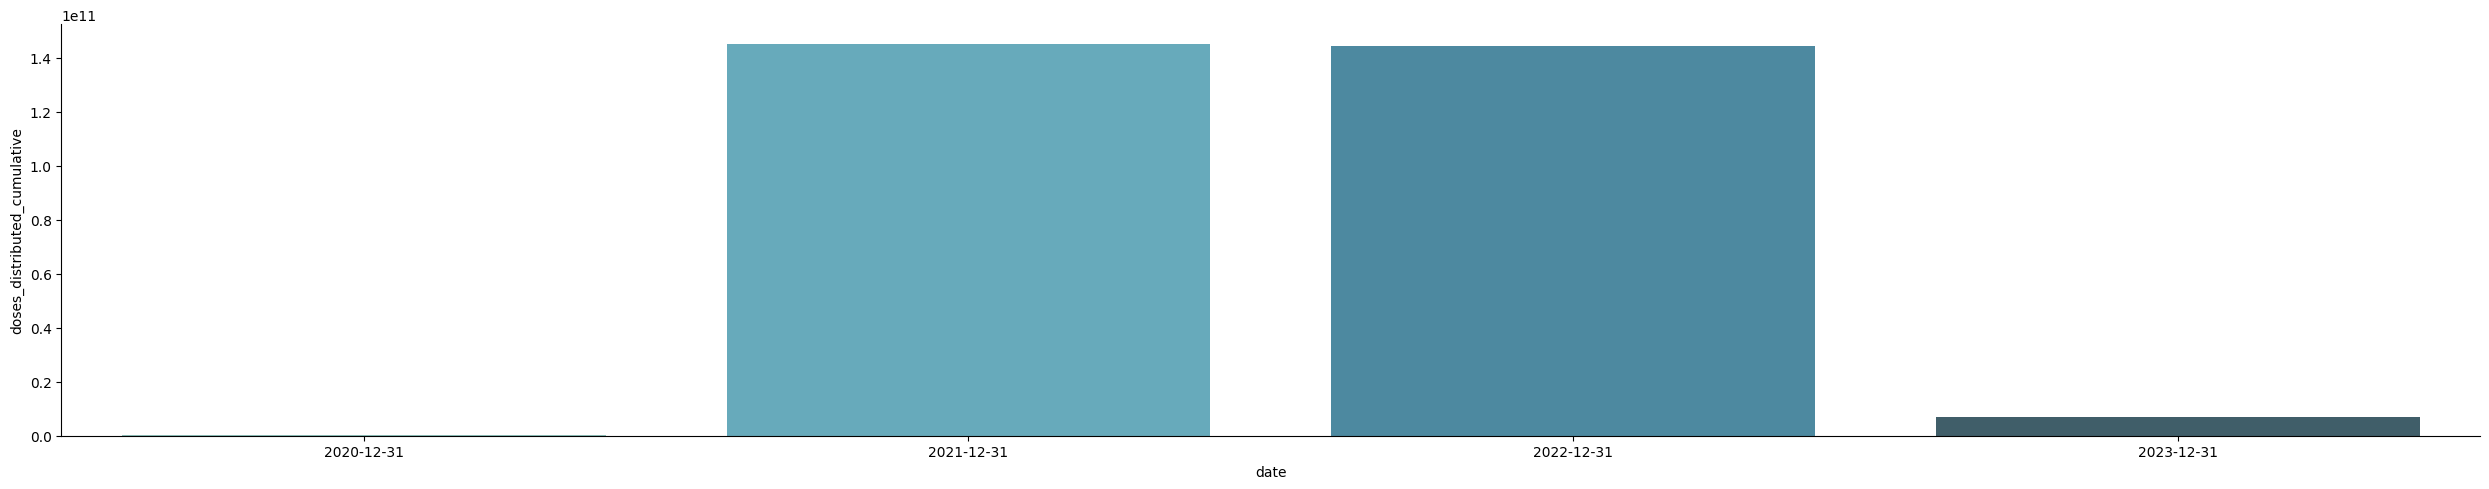

In [15]:
sns.catplot(x = 'date', y = "doses_distributed_cumulative", kind= "bar", data = doses_por_ano, aspect = 5,
    palette = "GnBu_d")

A porcentagem de distribuição e administração de cada estado

In [16]:
df_completo_estadual['pct_administered'] = np.round((df_completo_estadual['doses_administered'] / df_completo_estadual['doses_distributed']) * 100, 2)
df_completo_estadual

,state_abbreviation,state_name,date,doses_distributed,doses_distributed_per_100k,doses_administered,doses_administered_per_100k,people_received_at_least_one_dose,people_vaccine_series_complete,doses_administered_moderna,...,pct_population_received_at_least_one_dose,pct_population_series_complete,population,doses_distributed_cumulative,doses_administered_cumulative,new_doses_distributed,new_doses_administered,new_doses_distributed_7_day_rolling_avg,new_doses_administered_7_day_rolling_avg,pct_administered
0,AK,Alaska,2023-02-15,2116435.0,289310.0,1316657.0,179983.0,533981.0,476305.0,504245.0,...,73.0,65.1,731545.0,0.0,0.0,0.0,0.0,0.00,0.00,62.21
1,AL,Alabama,2023-02-15,12126780.0,247325.0,6980749.0,142372.0,3186211.0,2606107.0,3021532.0,...,65.0,53.2,4903185.0,0.0,0.0,0.0,0.0,0.00,0.00,57.56
2,AR,Arkansas,2023-02-15,8213520.0,272169.0,4844298.0,160524.0,2108703.0,1715689.0,2063845.0,...,69.9,56.9,3017804.0,0.0,0.0,0.0,0.0,0.00,0.00,58.98
3,AS,American Samoa,2023-02-15,128480.0,271101.0,115163.0,243001.0,46188.0,42465.0,25549.0,...,95.0,89.6,47392.0,0.0,0.0,0.0,0.0,0.00,0.00,89.63
4,AZ,Arizona,2023-02-15,19452760.0,267255.0,14465675.0,198739.0,5645008.0,4803643.0,5573103.0,...,77.6,66.0,7278717.0,0.0,0.0,0.0,0.0,0.00,0.00,74.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37192,WY,Wyoming,2023-01-18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1251175.0,847354.0,4320.0,198.0,3827.14,1676.86,NaN
37193,WY,Wyoming,2023-01-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1252935.0,847465.0,1760.0,111.0,2992.86,1634.57,NaN
37194,WY,Wyoming,2023-02-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1254395.0,847573.0,1460.0,108.0,2804.29,1613.14,NaN
37195,WY,Wyoming,2023-02-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1257355.0,847666.0,2960.0,93.0,2470.00,562.71,NaN


In [17]:
controle_distribuicao = df_completo_estadual[['date','state_abbreviation', 'pct_administered']]
controle_distribuicao


,date,state_abbreviation,pct_administered
0,2023-02-15,AK,62.21
1,2023-02-15,AL,57.56
2,2023-02-15,AR,58.98
3,2023-02-15,AS,89.63
4,2023-02-15,AZ,74.36
...,...,...,...
37192,2023-01-18,WY,NaN
37193,2023-01-25,WY,NaN
37194,2023-02-01,WY,NaN
37195,2023-02-08,WY,NaN


In [18]:
controle_distribuicao = controle_distribuicao.dropna(subset=['pct_administered'])
controle_distribuicao = controle_distribuicao.sort_values(by='pct_administered', ascending=False)

controle_distribuicao


,date,state_abbreviation,pct_administered
10,2023-02-15,DD2,121.56
15,2023-02-15,GU,104.99
48,2023-02-15,PW,100.00
57,2023-02-15,VI,90.42
3,2023-02-15,AS,89.63
...,...,...,...
28,2023-02-15,MH,59.39
38,2023-02-15,NH,59.21
2,2023-02-15,AR,58.98
1,2023-02-15,AL,57.56


<ipython-input-19-be4cfb247248>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x = 'state_abbreviation', y = "pct_administered", kind= "bar", data = controle_distribuicao, aspect = 5,


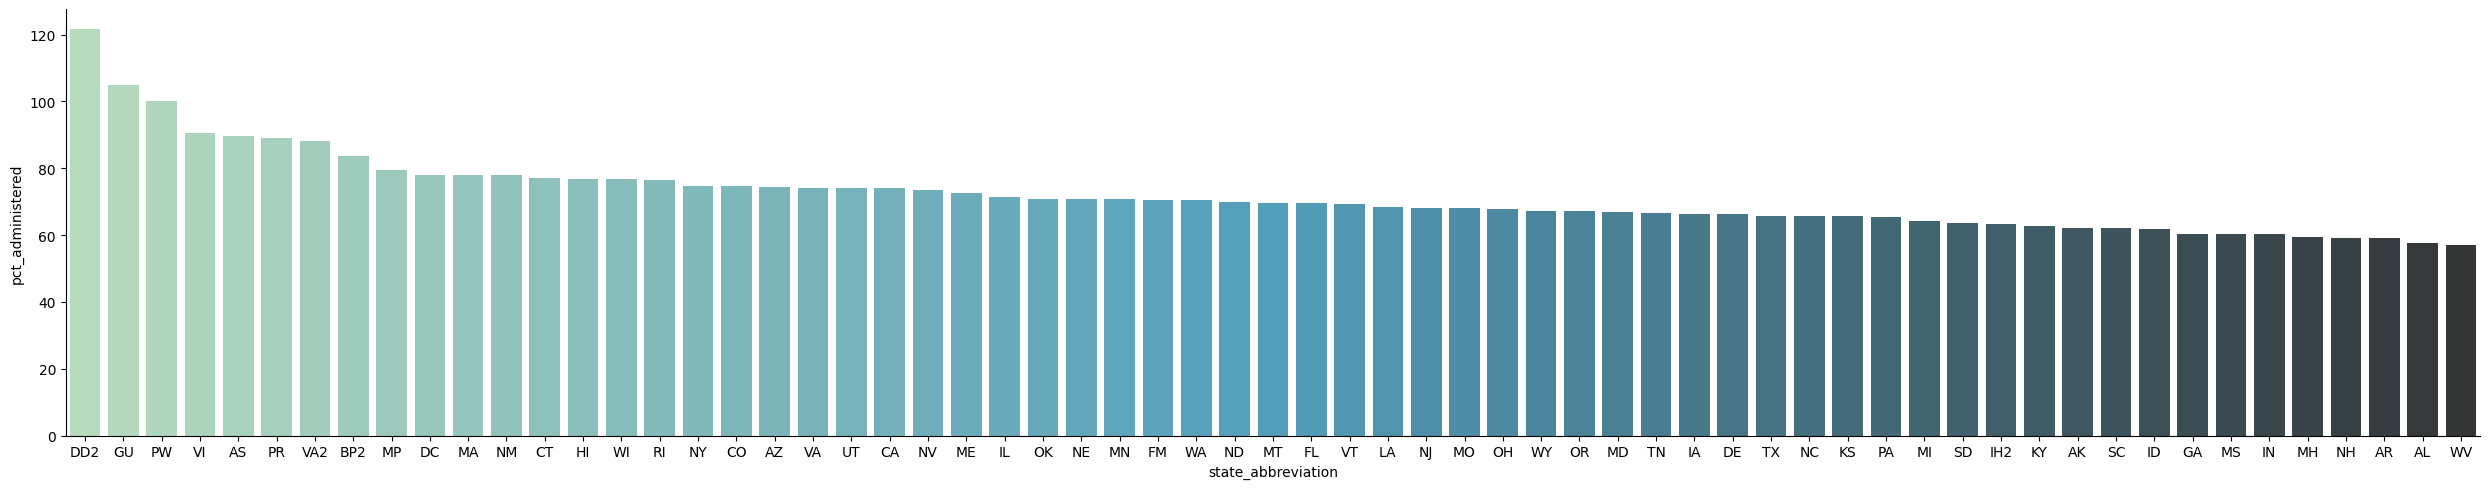

In [19]:
sns.catplot(x = 'state_abbreviation', y = "pct_administered", kind= "bar", data = controle_distribuicao, aspect = 5,
    palette = "GnBu_d")

In [20]:
dados = df_completo_estadual.loc[df_completo_estadual['state_abbreviation'] == 'DD2']
dados

,state_abbreviation,state_name,date,doses_distributed,doses_distributed_per_100k,doses_administered,doses_administered_per_100k,people_received_at_least_one_dose,people_vaccine_series_complete,doses_administered_moderna,...,pct_population_received_at_least_one_dose,pct_population_series_complete,population,doses_distributed_cumulative,doses_administered_cumulative,new_doses_distributed,new_doses_administered,new_doses_distributed_7_day_rolling_avg,new_doses_administered_7_day_rolling_avg,pct_administered
10,DD2,Dept of Defense,2023-02-15,7702450.0,0.0,9363104.0,0.0,4662751.0,3720005.0,3030138.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,121.56
5912,DD2,Dept of Defense,2020-12-14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,16575.0,0.0,0.0,0.0,0.00,0.00,NaN
5913,DD2,Dept of Defense,2020-12-15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,42900.0,0.0,26325.0,0.0,0.00,0.00,NaN
5914,DD2,Dept of Defense,2020-12-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,44850.0,0.0,1950.0,0.0,0.00,0.00,NaN
5915,DD2,Dept of Defense,2020-12-17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,44850.0,0.0,0.0,0.0,0.00,0.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,DD2,Dept of Defense,2023-01-18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,7653790.0,9328122.0,12300.0,10397.0,18154.29,16085.57,NaN
6493,DD2,Dept of Defense,2023-01-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,7671550.0,9337294.0,17760.0,9172.0,14811.43,14790.57,NaN
6494,DD2,Dept of Defense,2023-02-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,7680750.0,9346459.0,9200.0,9165.0,12797.14,13039.43,NaN
6495,DD2,Dept of Defense,2023-02-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,7690990.0,9356260.0,10240.0,9801.0,10568.57,11344.57,NaN


Existem lugares que tiveram mais doses admnistradas que distribuídas. E em outros estados, não houve a aplicação 100% das doses distribuídas, sendo o Estado de WV, com a menor porcentagem de admnistração das vacinas.

In [21]:
#histogram(data_frame=dados_distribuicao, x='state_abbreviation', y='date', color='doses_distributed_cumulative'
         # height=600, nbins=dados['state_abbreviation'].nunique()).show()

In [22]:
df_completo_estadual


,state_abbreviation,state_name,date,doses_distributed,doses_distributed_per_100k,doses_administered,doses_administered_per_100k,people_received_at_least_one_dose,people_vaccine_series_complete,doses_administered_moderna,...,pct_population_received_at_least_one_dose,pct_population_series_complete,population,doses_distributed_cumulative,doses_administered_cumulative,new_doses_distributed,new_doses_administered,new_doses_distributed_7_day_rolling_avg,new_doses_administered_7_day_rolling_avg,pct_administered
0,AK,Alaska,2023-02-15,2116435.0,289310.0,1316657.0,179983.0,533981.0,476305.0,504245.0,...,73.0,65.1,731545.0,0.0,0.0,0.0,0.0,0.00,0.00,62.21
1,AL,Alabama,2023-02-15,12126780.0,247325.0,6980749.0,142372.0,3186211.0,2606107.0,3021532.0,...,65.0,53.2,4903185.0,0.0,0.0,0.0,0.0,0.00,0.00,57.56
2,AR,Arkansas,2023-02-15,8213520.0,272169.0,4844298.0,160524.0,2108703.0,1715689.0,2063845.0,...,69.9,56.9,3017804.0,0.0,0.0,0.0,0.0,0.00,0.00,58.98
3,AS,American Samoa,2023-02-15,128480.0,271101.0,115163.0,243001.0,46188.0,42465.0,25549.0,...,95.0,89.6,47392.0,0.0,0.0,0.0,0.0,0.00,0.00,89.63
4,AZ,Arizona,2023-02-15,19452760.0,267255.0,14465675.0,198739.0,5645008.0,4803643.0,5573103.0,...,77.6,66.0,7278717.0,0.0,0.0,0.0,0.0,0.00,0.00,74.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37192,WY,Wyoming,2023-01-18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1251175.0,847354.0,4320.0,198.0,3827.14,1676.86,NaN
37193,WY,Wyoming,2023-01-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1252935.0,847465.0,1760.0,111.0,2992.86,1634.57,NaN
37194,WY,Wyoming,2023-02-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1254395.0,847573.0,1460.0,108.0,2804.29,1613.14,NaN
37195,WY,Wyoming,2023-02-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1257355.0,847666.0,2960.0,93.0,2470.00,562.71,NaN


In [23]:
dados_doses_percentuais = df_completo_estadual[['state_abbreviation', 'pct_population_received_at_least_one_dose', 'pct_population_series_complete' ]]

dados_doses_percentuais

,state_abbreviation,pct_population_received_at_least_one_dose,pct_population_series_complete
0,AK,73.0,65.1
1,AL,65.0,53.2
2,AR,69.9,56.9
3,AS,95.0,89.6
4,AZ,77.6,66.0
...,...,...,...
37192,WY,0.0,0.0
37193,WY,0.0,0.0
37194,WY,0.0,0.0
37195,WY,0.0,0.0


In [24]:
dados_doses_percentuais = dados_doses_percentuais[dados_doses_percentuais['pct_population_received_at_least_one_dose'] != 0]

dados_doses_percentuais = dados_doses_percentuais[dados_doses_percentuais['pct_population_series_complete'] != 0]


<ipython-input-25-71fadbacfc18>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x = 'state_abbreviation', y = 'pct_population_received_at_least_one_dose', kind= "bar", data = dados_doses_percentuais, aspect = 5,


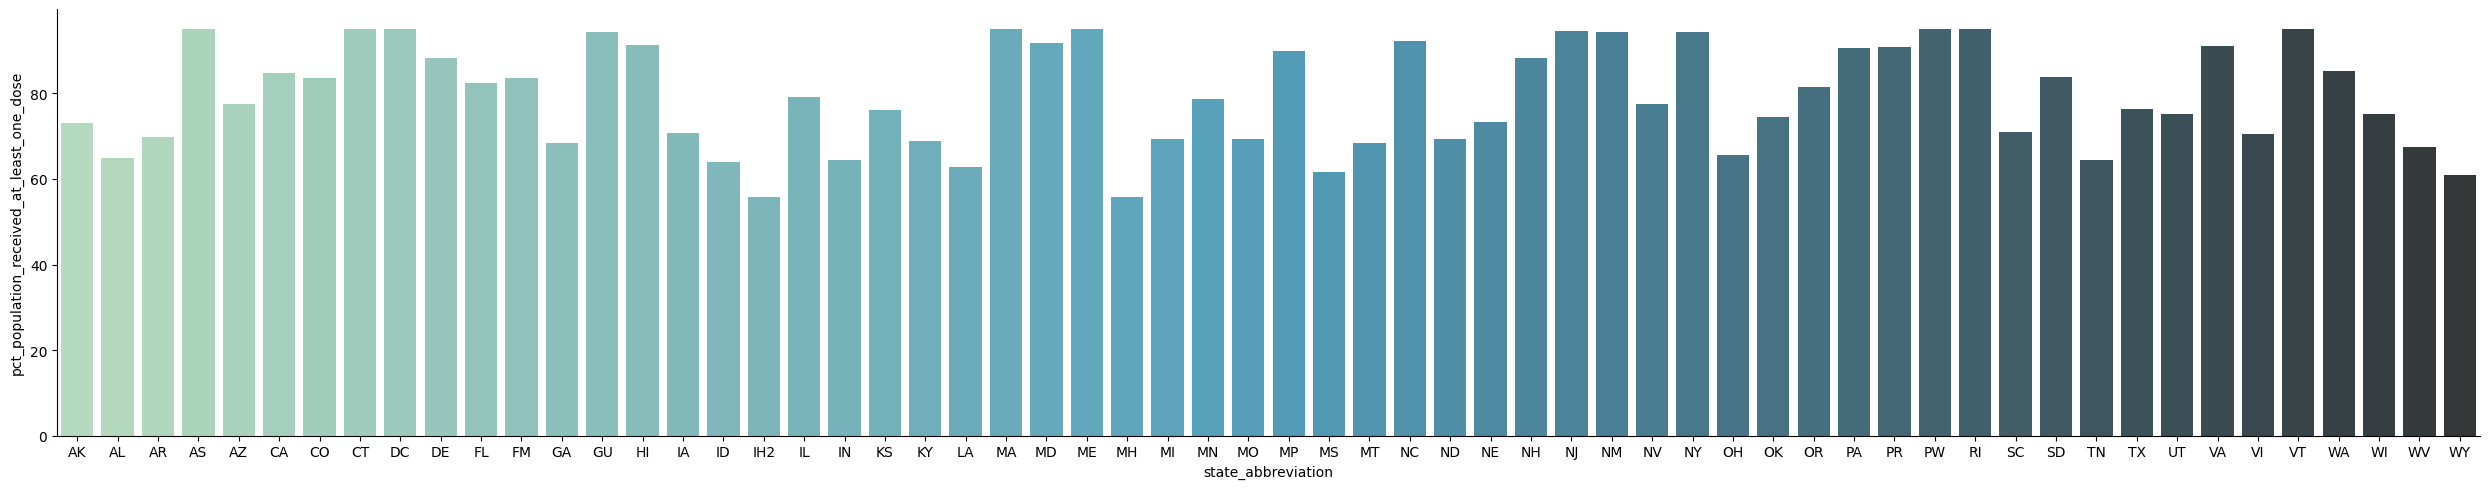

In [25]:
sns.catplot(x = 'state_abbreviation', y = 'pct_population_received_at_least_one_dose', kind= "bar", data = dados_doses_percentuais, aspect = 5,
    palette = "GnBu_d")

<ipython-input-26-94c0d9859b2c>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x = 'state_abbreviation', y = 'pct_population_series_complete', kind= "bar", data = dados_doses_percentuais, aspect = 5,


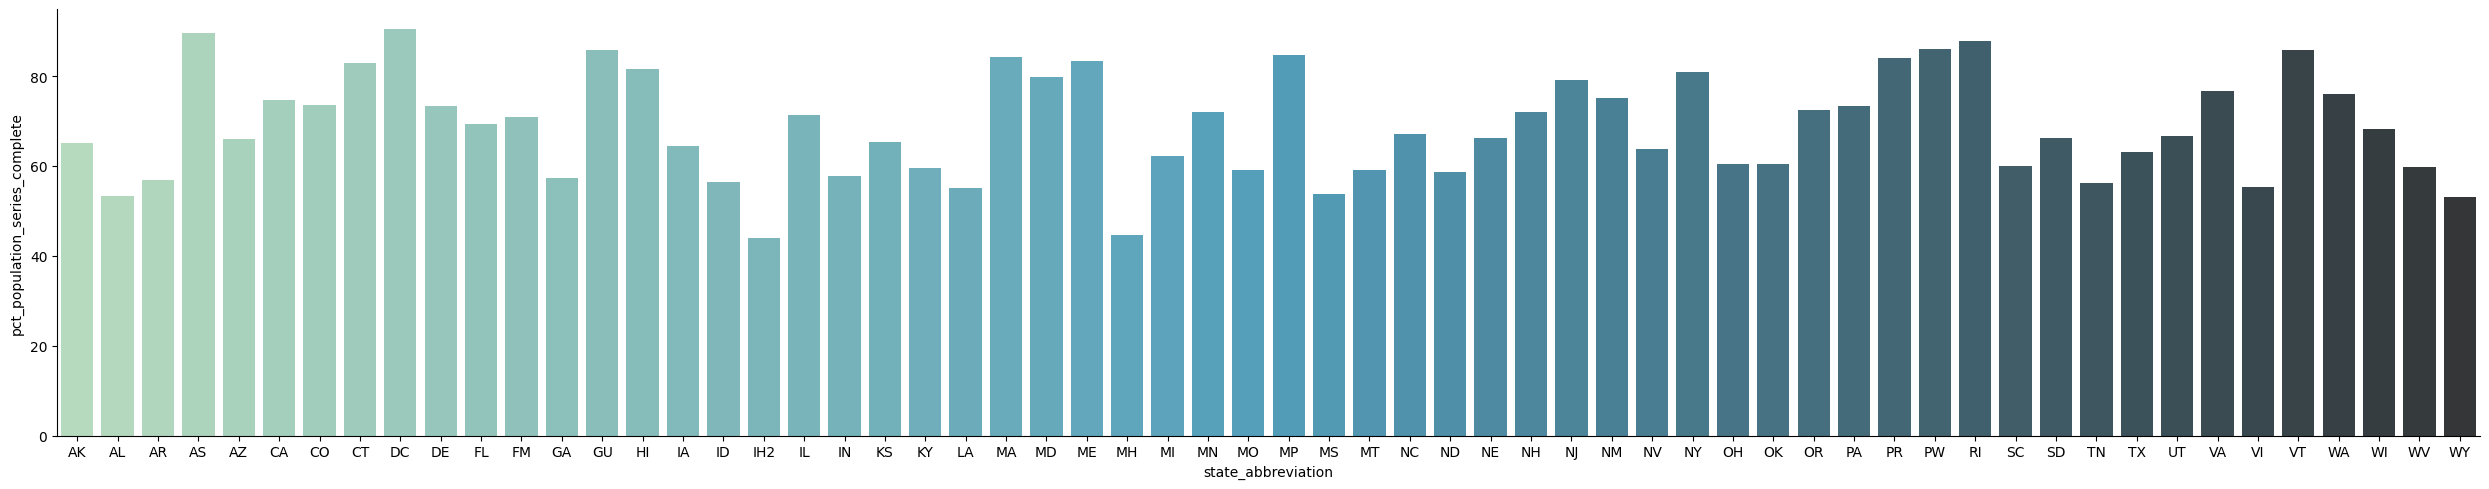

In [26]:
sns.catplot(x = 'state_abbreviation', y = 'pct_population_series_complete', kind= "bar", data = dados_doses_percentuais, aspect = 5,
    palette = "GnBu_d")